In [11]:
!pip install prophet
!pip install numpy

In [12]:
#import the needed code modules
#Pandas- basic for JN/JL/COLAB
import pandas as pd
#MatPlotlib- to assist with cultivating plots of data
import matplotlib.pyplot as plt
#NumPy- to access the library for mean() and other mathematical commands
import numpy as np
#Prophet- to predict future data in specific dataframes/data collections
from prophet import Prophet

In [13]:
#Read the CSV files into the program/cells.
##Everything present in this cell is filler as of now, it should be fixed when
##utilizing this cell with the propeer CSV file information.

data_x = pd.read_csv("files/congress-trading-all.csv")

#Produce Dataframes for the CSV files
x_df = pd.DataFrame(data_x)

#Display the DataFrames. . . 
display(x_df.head())

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,BioGuideID,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
0,GLW,ST,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,-1.054504,Georgia,2024-07-25
1,ABCB,ST,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",NEW,STIFEL,NaN,Earl Leroy Carter,C001103,2024-07-24,R,GA01,House,NaN,2024-07-25,2.772833,Georgia,2024-07-25
2,UPS,ST,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.592441,Georgia,2024-07-25
3,DUK,ST,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.541266,Georgia,2024-07-25
4,JPM,ST,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",NEW,NaN,NaN,Marjorie Taylor Mrs Greene,G000596,2024-07-24,R,GA14,House,NaN,2024-07-25,2.599848,Georgia,2024-07-25


In [14]:
x_df_clean = x_df[['Name','Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
display(x_df_clean.head())
display(x_df_clean.tail())

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene,R,CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter,R,AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene,R,"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene,R,DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene,R,JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
47266,Ms. Tammy Duckworth,D,"CATERPILLAR, INC.",2012-07-26,Purchase,"$1,001 - $15,000",19.001886
47267,Ms. Tammy Duckworth,D,PROCTER & GAMBLE COMPANY,2012-07-24,Sale,"$1,001 - $15,000",-143.881120
47268,Mr. Alan S. Lowenthal,D,KANSAS CITY SOUTHERN,2012-06-06,Purchase,"$1,001 - $15,000",89.238230
47269,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-03-20,Sale,"$1,001 - $15,000",NaN
47270,Mr. Alan S. Lowenthal,D,EL PASO CORPORATION PREFERRED STOCK,2012-02-27,Sale,"$1,001 - $15,000",NaN


In [15]:
for column in x_df_clean.columns:
    print(x_df_clean['Name'].value_counts())

Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick T. Mchenry         1
Casey, Robert P. Jr.       1
Name: count, Length: 346, dtype: int64
Name
Josh Gottheimer         2786
Thomas Macarthur        2758
Perdue, David           2242
Lois Frankel            1358
Greg Gianforte          1331
                        ... 
Thune, John                1
Mr. Paul Ryan              1
Russ Fulcher               1
Patrick 

In [16]:
x_df_clean['Name'].unique()

array(['Marjorie Taylor Mrs Greene', 'Earl Leroy Carter',
       'Robert E. Latta', 'Kathy Castor', 'Rudy Yakym Iii',
       'Boozman, John', 'Rick Larsen', 'Jamie Raskin',
       'Gerald E. Connolly', 'Nancy Pelosi', 'Mark Dr Green',
       'Josh Gottheimer', 'Victoria Spartz', 'Kevin Hern',
       'Morgan Mcgarvey', 'Earl Blumenauer', 'Whitehouse, Sheldon',
       'Capito, Shelley Moore', 'Max Miller', 'Mullin, Markwayne',
       'Lloyd Doggett', 'Debbie Dingell', 'Richard W. Allen',
       'Kathy Manning', 'Thomas H. Kean Jr.', 'Pete Sessions',
       'Abigail Spanberger', 'McConnell, A. Mitchell Jr.',
       'Hickenlooper, John', 'Carper, Thomas R.', 'Stephen F. Lynch',
       'Virginia Foxx', 'Chip Roy', 'William R. Keating',
       'Debbie Wasserman Schultz', 'Peters, Gary', 'Mikie Sherrill',
       'Tuberville, Tommy', 'Susie Lee', 'Carol Devine Miller',
       'C. Scott Franklin', 'Maria Elvira Salazar', 'Jonathan Jackson',
       'Deborah Ross', 'Cruz, Ted', 'Mike Kelly', 'Dan

In [17]:
x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'
x_df_clean2 = x_df_clean[['Name_Party', 'Company','Traded', 'Transaction', 'Trade_Size_USD', 'excess_return']]
x_df_clean2.head()

/var/folders/k4/ds2_p0md3jn6b2dh7nt_yzth0000gn/T/ipykernel_18410/1642867295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_df_clean['Name_Party'] = x_df_clean['Name'] + ' (' + x_df_clean['Party'] + ')'


,Name_Party,Company,Traded,Transaction,Trade_Size_USD,excess_return
0,Marjorie Taylor Mrs Greene (R),CORNING INCORPORATED COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",-1.054504
1,Earl Leroy Carter (R),AMERIS BANCORP - COMMON STOCK,2024-07-23,Sale,"$100,001 - $250,000",2.772833
2,Marjorie Taylor Mrs Greene (R),"UNITED PARCEL SERVICE, INC. COMMON STOCK",2024-07-23,Purchase,"$1,001 - $15,000",2.592441
3,Marjorie Taylor Mrs Greene (R),DUKE ENERGY CORPORATION,2024-07-23,Purchase,"$1,001 - $15,000",2.541266
4,Marjorie Taylor Mrs Greene (R),JP MORGAN CHASE & CO. COMMON STOCK,2024-07-23,Purchase,"$1,001 - $15,000",2.599848


In [18]:
for column in x_df_clean2.columns:
    print(x_df_clean2['Name_Party'].value_counts())

Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          1331
                            ... 
Thune, John (R)                1
Mr. Paul Ryan (R)              1
Russ Fulcher (R)               1
Patrick T. Mchenry (R)         1
Casey, Robert P. Jr. (D)       1
Name: count, Length: 346, dtype: int64
Name_Party
Josh Gottheimer (D)         2786
Thomas Macarthur (R)        2758
Perdue, David (R)           2242
Lois Frankel (D)            1358
Greg Gianforte (R)          133

In [19]:
top_subjects = x_df_clean2['Name_Party'].value_counts().head(6)
top_subjects

Name_Party
Josh Gottheimer (D)     2786
Thomas Macarthur (R)    2758
Perdue, David (R)       2242
Lois Frankel (D)        1358
Greg Gianforte (R)      1331
Susie Lee (D)           1262
Name: count, dtype: int64

In [20]:
df_josh = x_df_clean[x_df_clean['Name_Party'] == 'Josh Gottheimer (D)']
df_thomas = x_df_clean[x_df_clean['Name_Party'] == 'Thomas Macarthur (R)']
df_perdue = x_df_clean[x_df_clean['Name_Party'] == 'Perdue, David (R)']
df_lois = x_df_clean[x_df_clean['Name_Party'] == 'Lois Frankel (D)']
df_greg = x_df_clean[x_df_clean['Name_Party'] == 'Greg Gianforte (R)']
df_susie = x_df_clean[x_df_clean['Name_Party'] == 'Susie Lee (D)']

<Axes: >

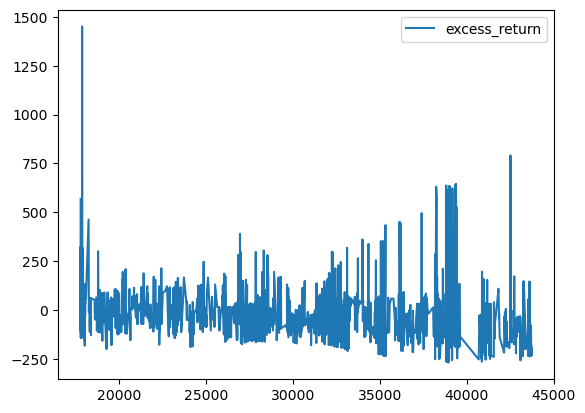

In [21]:
df_perdue.plot()

In [22]:
df_r = [df_thomas, df_perdue, df_greg]
combined_rep_df = pd.concat(df_r, axis=0)
display(combined_rep_df)

df_d = [df_josh, df_lois, df_susie]
combined_dem_df = pd.concat(df_d, axis=0)
display(combined_dem_df)

,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
21206,Thomas Macarthur,R,"INTERACTIVE BROKERS GROUP, INC.",2019-12-21,Purchase,"$1,001 - $15,000",83.469809,Thomas Macarthur (R)
26980,Thomas Macarthur,R,PHILIP MORRIS INTERNATIONAL INC,2018-12-31,Sale,"$1,001 - $15,000",-47.912357,Thomas Macarthur (R)
26990,Thomas Macarthur,R,NXP SEMICONDUCTORS N.V.,2018-12-31,Purchase,"$15,001 - $50,000",128.382528,Thomas Macarthur (R)
26997,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
26999,Thomas Macarthur,R,VANGUARD FTSE DEVELOPED MARKETS ETF,2018-12-28,Purchase,"$1,001 - $15,000",-83.909767,Thomas Macarthur (R)
...,...,...,...,...,...,...,...,...
33546,Greg Gianforte,R,ACUITY BRANDS INC,2017-07-10,Sale,"$1,001 - $15,000",-99.649286,Greg Gianforte (R)
33552,Greg Gianforte,R,"GRAND CANYON EDUCATION, INC.",2017-07-10,Sale,"$1,001 - $15,000",-24.170552,Greg Gianforte (R)
33553,Greg Gianforte,R,VEEVA SYSTEMS INC. CLASS A,2017-07-10,Sale,"$1,001 - $15,000",84.825189,Greg Gianforte (R)
33608,Greg Gianforte,R,"DASSAULT SYSTEMES, S.A. AMERICAN DEPOSITARY SH...",2017-06-30,Sale,"$100,001 - $250,000",NaN,Greg Gianforte (R)


,Name,Party,Company,Traded,Transaction,Trade_Size_USD,excess_return,Name_Party
24,Josh Gottheimer,D,MARRIOTT INTERNATIONAL - CLASS A COMMON STOCK,2024-06-28,Sale,"$1,001 - $15,000",-2.178386,Josh Gottheimer (D)
25,Josh Gottheimer,D,APPLE INC. - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",3.444960,Josh Gottheimer (D)
27,Josh Gottheimer,D,NVIDIA CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-8.523072,Josh Gottheimer (D)
28,Josh Gottheimer,D,MICROSOFT CORPORATION - COMMON STOCK,2024-06-28,Purchase,"$1,001 - $15,000",-4.890644,Josh Gottheimer (D)
30,Josh Gottheimer,D,"LOWE'S COMPANIES, INC. COMMON STOCK",2024-06-28,Sale,"$1,001 - $15,000",8.310732,Josh Gottheimer (D)
...,...,...,...,...,...,...,...,...
26713,Susie Lee,D,DELL TECHNOLOGIES INC. CLASS C,2019-01-14,Purchase,"$1,001 - $15,000",53.842616,Susie Lee (D)
26739,Susie Lee,D,BP P.L.C.,2019-01-11,Sale,"$15,001 - $50,000",-119.936903,Susie Lee (D)
26742,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
26744,Susie Lee,D,GREAT CANADIAN GAMING CORP ORDINARY SHARES,2019-01-11,Sale,"$1,001 - $15,000",NaN,Susie Lee (D)
